In [6]:
import torch as t 
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pylab as plt
from torch.nn.utils import clip_grad_value_
%matplotlib inline
import pickle
from torchvision import datasets, transforms
import tqdm
import os
import sys
sys.path.append('../src/')

In [7]:
import importlib 
import var_net as var_net
import mnist_utils as utils
importlib.reload(utils)
importlib.reload(var_net)



<module 'var_net' from '../src/var_net.py'>

In [8]:
device = 'cuda' # cuda or cpu
device = t.device(device)
if device == 'cuda':
    t.backends.cudnn.deterministic = True
    t.backends.cudnn.benchmark = False

In [9]:
batch_size = 256
init_log_sigma = -3.0 # логарифм дисперсии вариационного распределения при инициализации
prior_sigma = .1 # априорная дисперсия
epoch_num = 25 #количество эпох
lamb = [0.01, 0.1, 1,  10, 100]

hidden_num = 50 # количество нейронов на скрытом слое
acc_delete = [] 
start_num = 5
path_to_save = 'saved_mnist'

if not os.path.exists(path_to_save):
    os.mkdir(path_to_save)

In [10]:
# загрузка данных
train_data = torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                                  torchvision.transforms.Lambda(lambda x: x.view(-1))
                              ]))

test_data = torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                                  torchvision.transforms.Lambda(lambda x: x.view(-1))
                              ]))


train_loader = t.utils.data.DataLoader(train_data, batch_size=batch_size, pin_memory=True )
test_loader = t.utils.data.DataLoader(test_data, batch_size=batch_size)





In [ ]:
t.manual_seed(0)
for lam in lamb:
    for start in range(start_num):                    
            net = var_net.VarNet(var_net.VarLayer(784,  hidden_num, 
                                            prior_sigma = prior_sigma, init_log_sigma=init_log_sigma), 
                                 var_net.VarLayer(hidden_num, 10, prior_sigma=prior_sigma,  init_log_sigma=init_log_sigma,
                                          act=lambda x:x))
            
            net = net.to(device)
            optim = t.optim.Adam(net.parameters(), lr=5e-4)
            loss_fn = nn.CrossEntropyLoss().to(device)            
            for e in range(epoch_num):
                label = 'lambda {}, epoch {}: '.format(lam, e)                
                utils.train_batches_net(train_loader,len(train_data),  net, device, loss_fn, optim, t.tensor(lam), label, rep=True)
                if e%5 == 0:
                    print (utils.test_acc_net(net, device, test_loader))
            t.save(net.state_dict(), os.path.join(path_to_save, 'rep_net_lam_{}_start_{}.cpk'.format(lam, start)))

lambda 0.01, epoch 1: 2.2388937:   1%|          | 2/235 [00:00<00:14, 16.61it/s]

0.8345


lambda 0.01, epoch 6: 1.8272017:   1%|          | 2/235 [00:00<00:15, 15.34it/s]

0.9359


lambda 0.01, epoch 11: 1.6936074:   1%|          | 2/235 [00:00<00:17, 13.25it/s]

0.9533


lambda 0.01, epoch 16: 1.5591784:   1%|          | 2/235 [00:00<00:15, 14.63it/s]

0.9609


lambda 0.01, epoch 21: 1.3945572:   1%|          | 2/235 [00:00<00:19, 11.72it/s]

0.9658


lambda 0.01, epoch 1: 2.2004023:   1%|          | 2/235 [00:00<00:12, 19.09it/s]

0.8489


lambda 0.01, epoch 6: 1.8415438:   1%|          | 2/235 [00:00<00:14, 16.05it/s]

0.9338


lambda 0.01, epoch 11: 1.6965008:   1%|          | 2/235 [00:00<00:11, 19.81it/s]

0.9472


lambda 0.01, epoch 16: 1.5515974:   1%|          | 2/235 [00:00<00:13, 16.74it/s]

0.9553


lambda 0.01, epoch 21: 1.3727509:   1%|          | 2/235 [00:00<00:18, 12.74it/s]

0.9587


lambda 0.01, epoch 1: 2.2628798:   1%|          | 2/235 [00:00<00:12, 18.32it/s]

0.8368


lambda 0.01, epoch 6: 1.8613377:   1%|          | 2/235 [00:00<00:13, 16.72it/s]

0.9283


lambda 0.01, epoch 11: 1.7245218:   1%|          | 2/235 [00:00<00:19, 11.78it/s]

0.9449


lambda 0.01, epoch 16: 1.55851:   1%|          | 2/235 [00:00<00:14, 16.37it/s]  

0.9557


lambda 0.01, epoch 21: 1.3787603:   1%|          | 2/235 [00:00<00:13, 17.08it/s]

0.96


lambda 0.01, epoch 1: 2.269013:   1%|          | 2/235 [00:00<00:15, 15.48it/s] 

0.8327


lambda 0.01, epoch 6: 1.8156791:   1%|          | 2/235 [00:00<00:14, 15.75it/s]

0.9346


lambda 0.01, epoch 11: 1.6574821:   1%|          | 2/235 [00:00<00:18, 12.82it/s]

0.9528


lambda 0.01, epoch 16: 1.4921764:   1%|          | 2/235 [00:00<00:16, 13.73it/s]

0.9602


lambda 0.01, epoch 21: 1.2992383:   1%|          | 2/235 [00:00<00:15, 14.63it/s]

0.9622


lambda 0.01, epoch 1: 2.220579:   1%|          | 2/235 [00:00<00:13, 16.70it/s] 

0.8398


lambda 0.01, epoch 6: 1.8296312:   1%|          | 2/235 [00:00<00:15, 14.65it/s]

0.9356


lambda 0.01, epoch 11: 1.6968254:   1%|          | 2/235 [00:00<00:13, 17.08it/s]

0.9491


lambda 0.01, epoch 16: 1.5501941:   1%|          | 2/235 [00:00<00:11, 19.74it/s]

0.9569


lambda 0.01, epoch 21: 1.3668305:   1%|          | 2/235 [00:00<00:13, 16.78it/s]

0.9598


lambda 0.1, epoch 1: 1.4689261:   1%|          | 2/235 [00:00<00:17, 13.45it/s]

0.834


lambda 0.1, epoch 6: 1.0999607:   1%|          | 2/235 [00:00<00:12, 18.05it/s]

0.9418


lambda 0.1, epoch 11: 0.9814167:   1%|          | 2/235 [00:00<00:14, 16.54it/s]

0.9577


lambda 0.1, epoch 16: 0.86448777:   1%|          | 2/235 [00:00<00:18, 12.48it/s]

0.9645


lambda 0.1, epoch 21: 0.7213712:   1%|          | 2/235 [00:00<00:13, 16.85it/s] 

0.9672


lambda 0.1, epoch 1: 1.4798211:   0%|          | 0/235 [00:00<?, ?it/s]

0.8255


lambda 0.1, epoch 6: 1.1039879:   1%|          | 2/235 [00:00<00:17, 13.37it/s]

0.9336


lambda 0.1, epoch 11: 0.9966023:   1%|          | 2/235 [00:00<00:17, 13.28it/s]

0.9497


lambda 0.1, epoch 16: 0.8682662:   1%|          | 2/235 [00:00<00:18, 12.29it/s]

0.9575


lambda 0.1, epoch 21: 0.7159097:   1%|          | 2/235 [00:00<00:15, 14.93it/s]

0.9618


lambda 0.1, epoch 1: 1.4534855:   1%|          | 2/235 [00:00<00:13, 17.50it/s]

0.85


lambda 0.1, epoch 6: 1.1195592:   1%|          | 2/235 [00:00<00:14, 16.08it/s]

0.9344


lambda 0.1, epoch 11: 1.0048176:   1%|          | 2/235 [00:00<00:15, 15.41it/s]

0.949


lambda 0.1, epoch 16: 0.8914392:   1%|▏         | 3/235 [00:00<00:11, 20.58it/s]

0.9552


lambda 0.1, epoch 21: 0.74474496:   1%|          | 2/235 [00:00<00:11, 19.46it/s]

0.9601


lambda 0.1, epoch 1: 1.4094905:   1%|▏         | 3/235 [00:00<00:12, 18.81it/s]

0.8513


lambda 0.1, epoch 6: 1.1045866:   1%|▏         | 3/235 [00:00<00:11, 19.80it/s]

0.9309


lambda 0.1, epoch 11: 1.0217464:   1%|▏         | 3/235 [00:00<00:09, 25.22it/s] 

0.9491


lambda 0.1, epoch 16: 0.8631466:   1%|▏         | 3/235 [00:00<00:09, 24.53it/s]

0.9582


lambda 0.1, epoch 21: 0.71529436:   1%|▏         | 3/235 [00:00<00:09, 24.43it/s]

0.9616


lambda 0.1, epoch 1: 1.5162926:   1%|          | 2/235 [00:00<00:11, 19.51it/s]

0.8139


lambda 0.1, epoch 6: 1.0996035:   1%|          | 2/235 [00:00<00:13, 16.83it/s]

0.9364


lambda 0.1, epoch 11: 0.980022:   1%|          | 2/235 [00:00<00:12, 19.24it/s] 

0.9504


lambda 0.1, epoch 16: 0.8497776:   0%|          | 1/235 [00:00<00:32,  7.19it/s]

0.9562


lambda 0.1, epoch 21: 0.70649177:   1%|          | 2/235 [00:00<00:14, 15.91it/s]

0.9615


lambda 1, epoch 1: 1.0074003:   1%|          | 2/235 [00:00<00:13, 17.03it/s] 

0.8204


lambda 1, epoch 6: 0.55309004:   1%|          | 2/235 [00:00<00:17, 13.06it/s]

0.9305


lambda 1, epoch 9: 0.50045013:  53%|█████▎    | 125/235 [00:09<00:08, 13.37it/s]

In [11]:
net = var_net.VarNet(var_net.VarLayer(784,  hidden_num, 
                                            prior_sigma = prior_sigma, init_log_sigma=init_log_sigma), 
                                 var_net.VarLayer(hidden_num, 10, prior_sigma=prior_sigma,  init_log_sigma=init_log_sigma,
                                          act=lambda x:x)).to(device)    

net = net.to(device)
lam_results = {}
for lam in lamb:
    lam_results[lam] = []
    for s in range(start_num):        
        print (lam, s)
        
        net.load_state_dict(t.load(os.path.join(path_to_save, 'rep_net_lam_{}_start_{}.cpk'.format(lam, s))))        
        lam_results[lam].append(utils.delete_10(net, device, lambda:utils.test_acc_net(net, device, test_loader)))
lam_results = {float(k):lam_results[k] for k in lam_results}
import json
with open(os.path.join(path_to_save, 'results_rep.json'),'w') as out:
    out.write(json.dumps(lam_results))  

../src/var_net.py:26: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  t.nn.init.xavier_uniform(self.mean)


0.01 0
0.01 1
0.01 2
0.01 3
0.01 4
0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
1 0
1 1
1 2
1 3
1 4
10 0
10 1
10 2
10 3
10 4
100 0
100 1
100 2
100 3
100 4


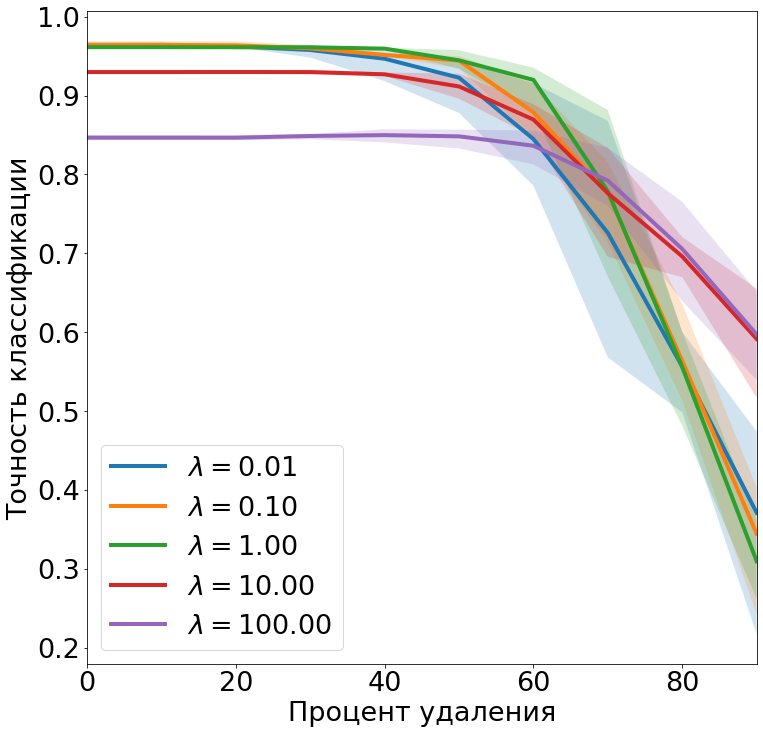

In [12]:
with open(os.path.join(path_to_save, 'results_rep.json'),'r') as inp:
    lam_results = json.loads(inp.read())
    lam_results = {float(k):lam_results[k] for k in lam_results} 
proc = [0,10,20,30,40,50,60,70,80,90]
plt.rcParams['figure.figsize'] = 12, 12
plt.rcParams.update({'font.size': 27})
plt.rc('lines', linewidth=4)
    
    
for lam in lamb:
    lam = float(lam)
    lam_str = "{:10.2f}".format(lam)

    plt.fill_between(proc, np.min(lam_results[lam], 0), np.max(lam_results[lam], 0), alpha=0.2)
    plt.plot(proc, np.mean(lam_results[lam], 0), label='$\lambda={}$'.format(lam_str))
plt.ylabel('Точность классификации', fontsize = 27)
plt.xlabel('Процент удаления', fontsize = 27)
plt.tick_params(axis='both', which='major', labelsize=27)
plt.legend(loc='lower left')
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('Rep')
#plt.show()
